MINI PROJECT 2


Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score

Loading Database

In [3]:
wine_df = pd.read_csv("/winequality-red.csv")

In [4]:
#Printing Whole Database
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
#Printing total row and coloumn using shape
wine_df.shape

(1599, 12)

In [6]:
# Printing First Five Rows of dataset using head()
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
# Printing Last Five Rows of dataset using tail()
wine_df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [8]:
# info(): whole info about whole data
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
# describe() : give details like percentile,mean, std, et
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
# isnull().sum() : Checking for any null/missing value
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

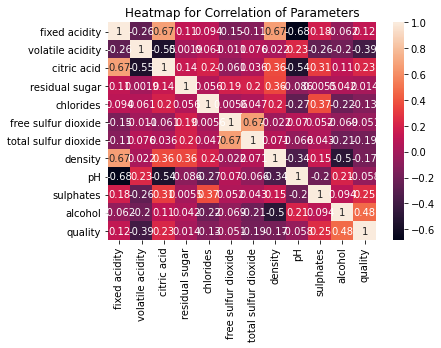

In [12]:
# Heatmap for Correlation of Parameters
corrwine = wine_df.corr()
sns.heatmap(corrwine, annot = True)
plt.title("Heatmap for Correlation of Parameters")
plt.show()

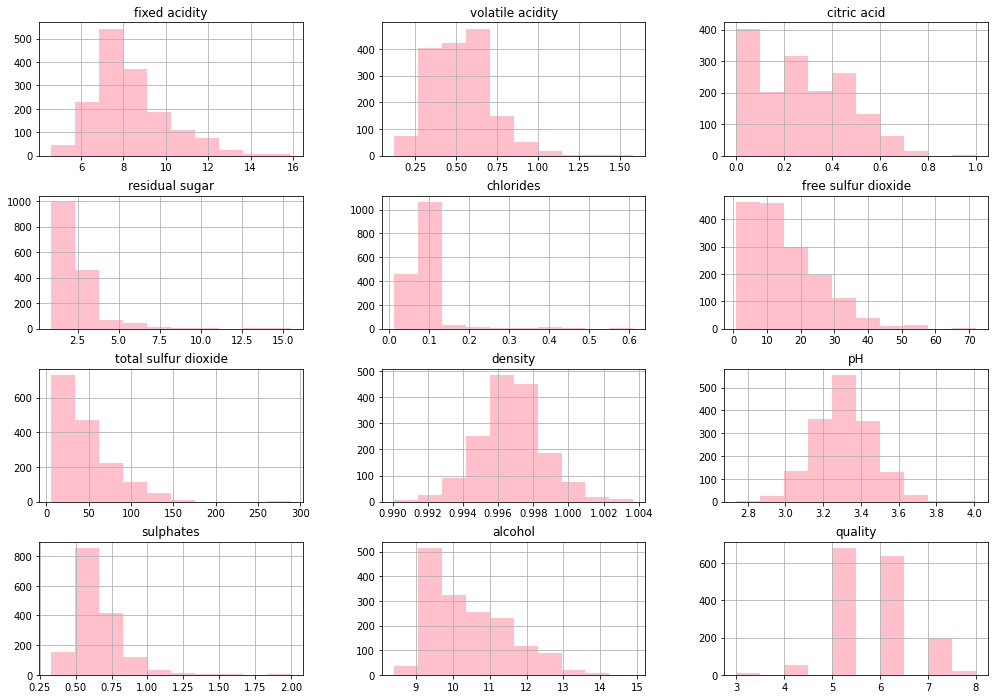

In [13]:
# PLotting Histogram for whole dataset using hist()
wine_df.hist(figsize=(17,12),color='Pink')
plt.show()

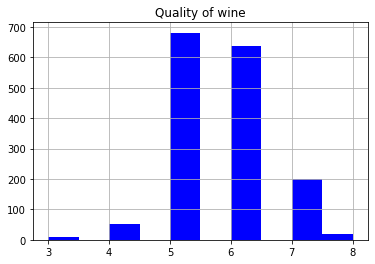

In [14]:
# Quality is out target variable so we see its distribution  

wine_df['quality'].hist(color='b')
plt.title('Quality of wine')
plt.show()

CHECKING QUALITY

If a wine has quality value over 5 its is a good wine and if value is below 5 its bad wine

In [15]:
# So changing quality value to True or False Based on if a wine has quality value over 5 
#(if quality > 5 its is a good wine or else its False)
y = wine_df['quality']>5
y

0       False
1       False
2       False
3        True
4       False
        ...  
1594    False
1595     True
1596     True
1597    False
1598     True
Name: quality, Length: 1599, dtype: bool

In [16]:
# Removing Target Variable i.e Quality
x=wine_df.iloc[:,:-1]
x


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


Splitting data into Training data and Testing data

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 , random_state = 40)

In [18]:
x_train.shape

(1279, 11)

In [19]:
x_test.shape

(320, 11)

**What is Standard Scaler ?**

StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation. StandardScaler makes the mean of the distribution 0. About 68% of the values will lie be between -1 and 1.

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [21]:
x_train

array([[ 0.04751863,  0.51780717, -0.78163522, ...,  0.43461675,
         1.37243155,  1.30013194],
       [ 0.16306298,  0.6571397 , -0.11611654, ..., -0.20995053,
        -0.33957688, -0.39686531],
       [ 0.97187343, -0.98698413,  0.90775836, ..., -1.04788799,
        -1.34316803, -0.96253106],
       ...,
       [-0.5879753 ,  0.6850062 , -1.39596016, ...,  0.49907347,
        -1.10702894, -0.39686531],
       [-0.29911442,  0.01621007,  0.29343342, ..., -0.08103707,
        -0.33957688, -0.86825343],
       [ 0.39415168,  0.40634115,  0.08865844, ...,  0.17678984,
        -0.5166812 , -0.39686531]])

In [22]:
x_test

array([[ 0.9968348 , -0.9067088 ,  0.39463346, ..., -0.89626755,
        -0.06280223,  0.15587039],
       [-1.53347036, -1.24517111,  0.55073075, ...,  0.0975149 ,
        -0.4753447 , -1.13608033],
       [ 0.60323178, -0.17337379,  0.39463346, ..., -0.10124159,
        -0.82895254,  0.24815259],
       ...,
       [-1.75838637, -1.18876073, -0.07365841, ...,  0.49502788,
        -0.65214862, -1.13608033],
       [ 1.22175082, -1.64004381,  0.8108929 , ..., -0.63125889,
         2.29458335,  0.34043478],
       [-1.53347036,  0.05226775, -1.16633944, ...,  2.74760144,
        -0.4753447 ,  0.89412795]])

Building Models using logistic regression

In [23]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
y_pred = log.predict(x_test)
y_pred

array([ True, False,  True,  True,  True, False,  True,  True, False,
       False,  True,  True,  True,  True, False,  True,  True, False,
       False, False, False,  True, False, False,  True, False,  True,
       False,  True, False, False,  True, False, False, False,  True,
        True, False,  True,  True, False,  True, False,  True,  True,
       False,  True,  True,  True, False,  True, False, False,  True,
        True, False,  True,  True,  True, False,  True, False,  True,
        True,  True, False, False,  True,  True,  True, False, False,
       False,  True,  True, False, False,  True,  True,  True,  True,
        True,  True, False,  True, False,  True, False,  True, False,
       False,  True,  True, False,  True,  True, False,  True,  True,
       False, False,  True, False,  True,  True,  True,  True,  True,
       False,  True,  True, False,  True,  True, False, False,  True,
        True,  True,  True, False, False, False, False, False,  True,
        True, False,

In [25]:
a = accuracy_score(y_test,y_pred)
a*100

77.5

In [26]:
c= confusion_matrix(y_test,y_pred)
c

array([[111,  36],
       [ 36, 137]])

In [27]:
p = precision_score(y_test,y_pred)
p*100

79.1907514450867

In [29]:
r = recall_score(y_test,y_pred)
r*100

79.1907514450867

Visualizing Confusion matrix using seaborn

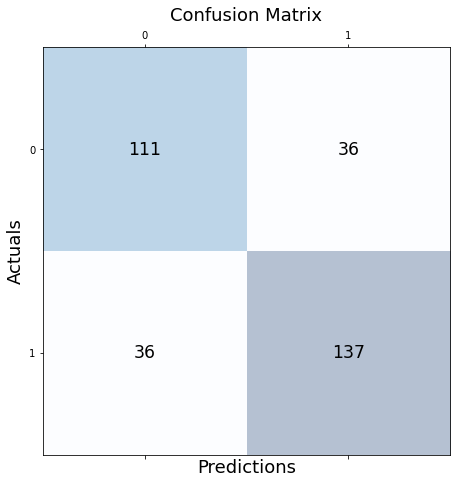

In [30]:
fig , ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(c, cmap=plt.cm.Blues, alpha=0.3)
for i in range(c.shape[0]):
    for j in range(c.shape[1]):
        ax.text(x=j, y=i,s=c[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()